<a href="https://colab.research.google.com/github/egonik-unlp/labo/blob/main/codigo_seminarios/seminario_nanoFOT_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empezando por cosas básicas

In [ ]:
!pip install agilentaspparser
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv
!git clone https://github.com/egonik-unlp/labo.git

--2021-05-08 03:46:02--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41295 (40K) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]  40.33K  --.-KB/s    in 0s      

2021-05-08 03:46:03 (108 MB/s) - ‘housing.csv’ saved [41295/41295]

Cloning into 'labo'...
remote: Enumerating objects: 406, done.
remote: Counting objects: 100% (406/406), done.
remote: Compressing objects: 100% (281/281), done.
remote: Total 406 (delta 118), reused 398 (delta 110), pack-reused 0
Receiving objects: 100% (406/406), 20.92 MiB | 22.67 MiB/s, done.
Resolving deltas: 100% (118/118), done.


In [ ]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import agilentaspparser as asp
from scipy.stats import uniform, loguniform
from scipy.signal import find_peaks
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import display as d
from IPython.display import Markdown as md 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  GridSearchCV, train_test_split, RandomizedSearchCV, cross_val_predict, cross_val_score
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, plot_precision_recall_curve, plot_roc_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.datasets import load_boston

# Grandes (Grandisimos) datasets.

In [ ]:
!wget https://raw.githubusercontent.com/egonik-unlp/random_projects/master/data_analytics/kaggle.json
!mkdir /root/.kaggle 
!cp kaggle.json /root/.kaggle
!pip install kaggle
!chmod 600 /root/.kaggle/kaggle.json
!cd /content/
!kaggle datasets download -d 'epa/hazardous-air-pollutants'
!unzip /content/hazardous-air-pollutants.zip -d /content/dataset


--2021-05-08 03:46:07--  https://raw.githubusercontent.com/egonik-unlp/random_projects/master/data_analytics/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68 [text/plain]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      68  --.-KB/s    in 0s      

2021-05-08 03:46:07 (3.13 MB/s) - ‘kaggle.json’ saved [68/68]

 97% 539M/558M [00:02<00:00, 234MB/s]
100% 558M/558M [00:02<00:00, 211MB/s]
Archive:  /content/hazardous-air-pollutants.zip
  inflating: /content/dataset/epa_hap_daily_summary.csv  


In [ ]:
# Es muy pesado de cargar, lo pongo en una celda individual para asegurarme de que no se corra dos veces
df = pd.read_csv('dataset/epa_hap_daily_summary.csv', parse_dates= True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


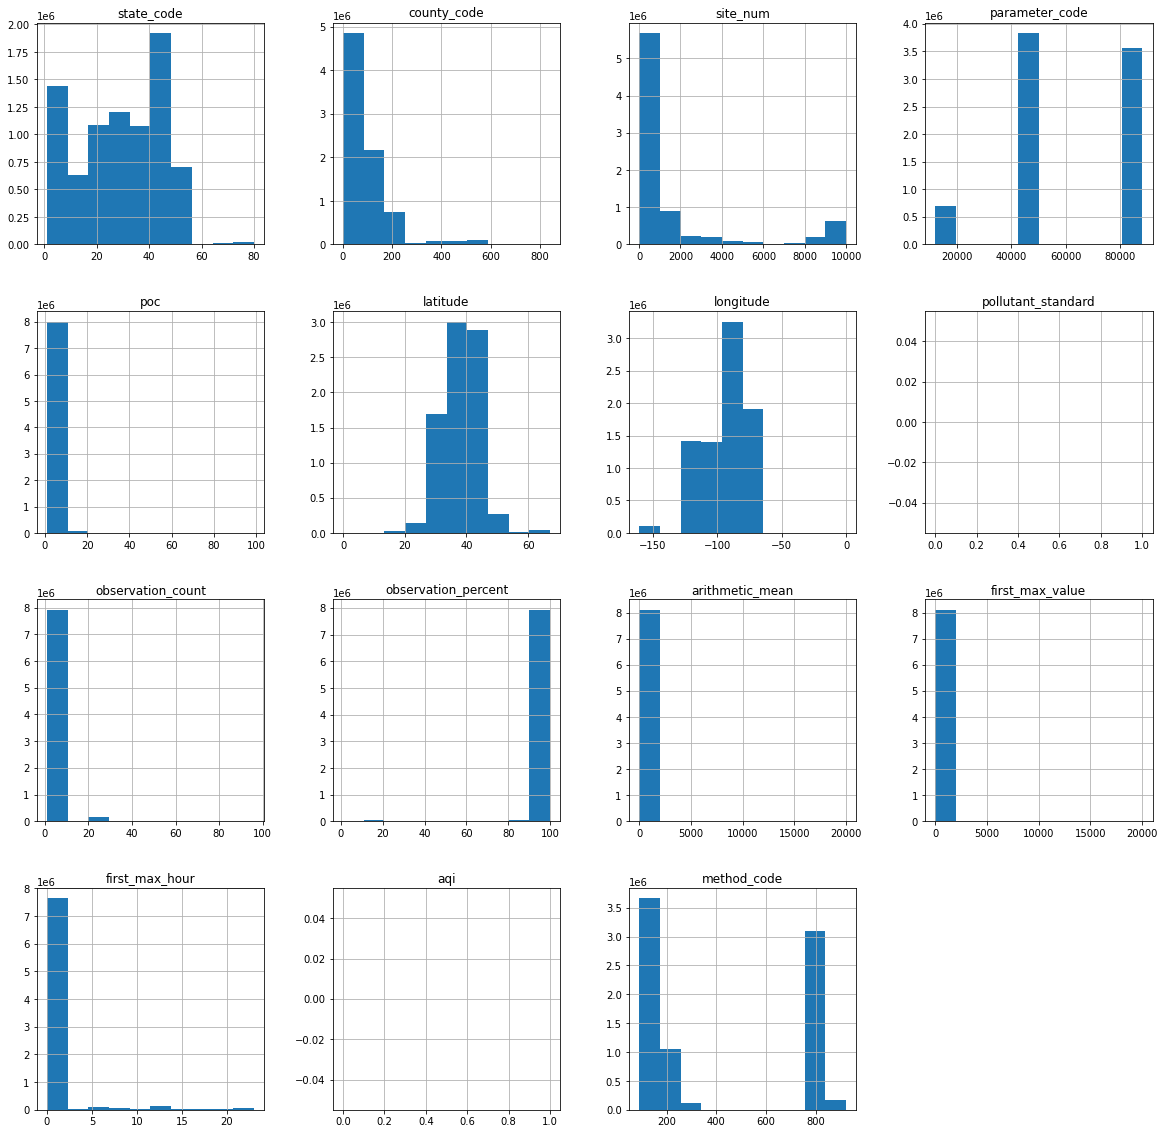

In [ ]:
plt.figure(figsize = (20,20))
hist = df.hist(ax = plt.gca())

In [ ]:
df.describe()

,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,pollutant_standard,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code
count,8.097069e+06,8.097069e+06,8.097069e+06,8.097069e+06,8.097069e+06,8.097069e+06,8.097069e+06,0.0,8.097069e+06,8.097069e+06,8.097069e+06,8.097069e+06,8.097069e+06,0.0,8.097069e+06
mean,2.930571e+01,8.995137e+01,1.370898e+03,6.042453e+04,2.835583e+00,3.818801e+01,-9.434529e+01,NaN,1.572091e+00,9.880965e+01,4.466537e-01,5.618971e-01,7.211276e-01,NaN,4.101036e+02
std,1.635628e+01,1.008587e+02,2.746745e+03,2.560563e+04,2.905911e+00,5.968574e+00,1.716207e+01,NaN,3.434705e+00,8.590761e+00,1.247981e+01,1.306216e+01,3.240937e+00,NaN,3.298626e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.210300e+04,1.000000e+00,0.000000e+00,-1.605083e+02,NaN,1.000000e+00,1.000000e+00,-1.000000e-01,-1.000000e-01,0.000000e+00,NaN,8.900000e+01
25%,1.600000e+01,2.700000e+01,8.000000e+00,4.380400e+04,1.000000e+00,3.394471e+01,-1.066766e+02,NaN,1.000000e+00,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.160000e+02
50%,2.800000e+01,6.300000e+01,4.200000e+01,4.386000e+04,1.000000e+00,3.892185e+01,-9.278027e+01,NaN,1.000000e+00,1.000000e+02,8.900000e-04,8.900000e-04,0.000000e+00,NaN,1.750000e+02
75%,4.500000e+01,1.190000e+02,1.007000e+03,8.811200e+04,5.000000e+00,4.219438e+01,-8.096230e+01,NaN,1.000000e+00,1.000000e+02,4.000000e-02,4.000000e-02,0.000000e+00,NaN,8.000000e+02
max,8.000000e+01,8.400000e+02,9.998000e+03,8.813600e+04,9.900000e+01,6.709195e+01,0.000000e+00,NaN,9.600000e+01,1.000000e+02,2.000000e+04,2.000000e+04,2.300000e+01,NaN,9.230000e+02


# Python como ecosistema para análisis de datos

/content/labo/2021/ir/datos_ir/colo


(4000.0, 650.0)

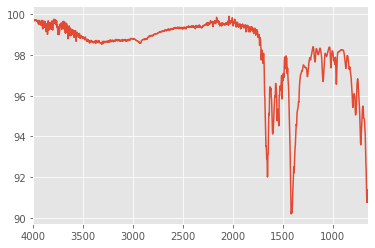

In [ ]:
plt.style.use('ggplot')

%cd /content/labo/2021/ir/datos_ir/colo
spectra = asp.load_dir('.')
mof90 = spectra.as_pandas()['mof90_2021-04-28T16-55-48']
mof90.plot()
plt.xlim(4000,650)

In [ ]:
peaks = find_peaks(100- mof90.values, height = 2.5, width = 5)[0]

(4000.0, 650.0)

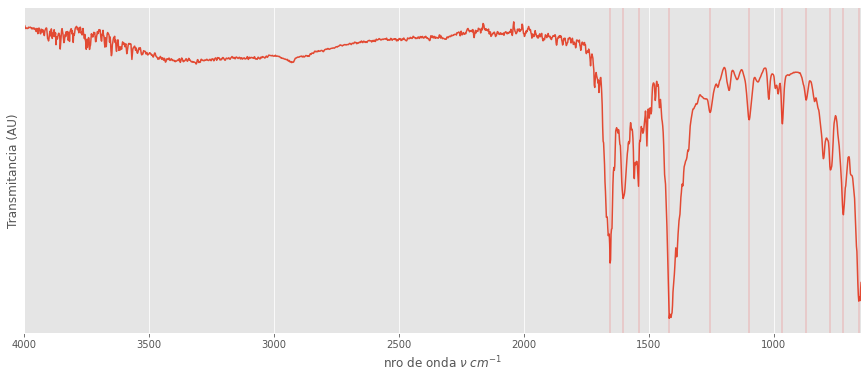

In [ ]:
fig = plt.figure(figsize = (15,6))
plt.plot(mof90)
plt.xlabel(r'nro de onda $\nu$ $cm^{-1}$')
plt.ylabel('Transmitancia (AU)')
plt.yticks([])
for nu in mof90.iloc[peaks].index:
  plt.axvline(nu, color = 'red', alpha = .15)
plt.xlim(4000,650)

(4000.0, 650.0)

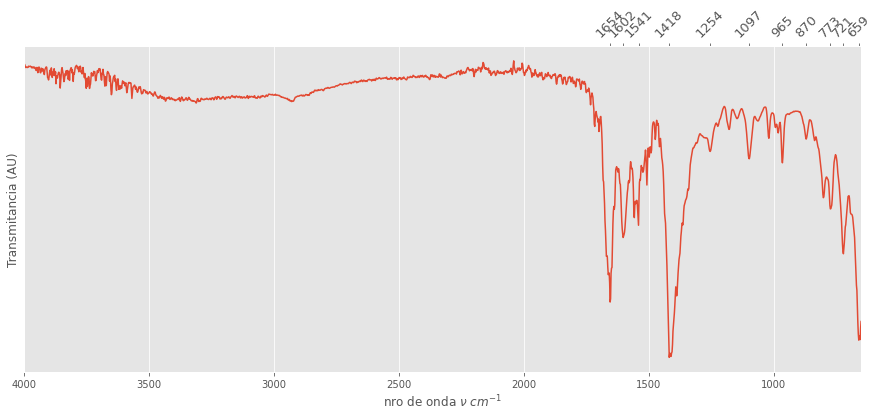

In [ ]:
fig = plt.figure(figsize = (15,6))
plt.plot(mof90)
plt.xlabel(r'nro de onda $\nu$ $cm^{-1}$')
plt.ylabel('Transmitancia (AU)')
plt.yticks([])
sax = plt.gca().secondary_xaxis('top')
sax.set_xticks(mof90.iloc[peaks].index)
sax.set_xticklabels(mof90.iloc[peaks].index.astype(int), rotation = 45, fontsize = 13)
plt.xlim(4000,650)


### Otros gráficos

/content/labo/2021/tau
70
51
258


<Figure size 576x432 with 0 Axes>

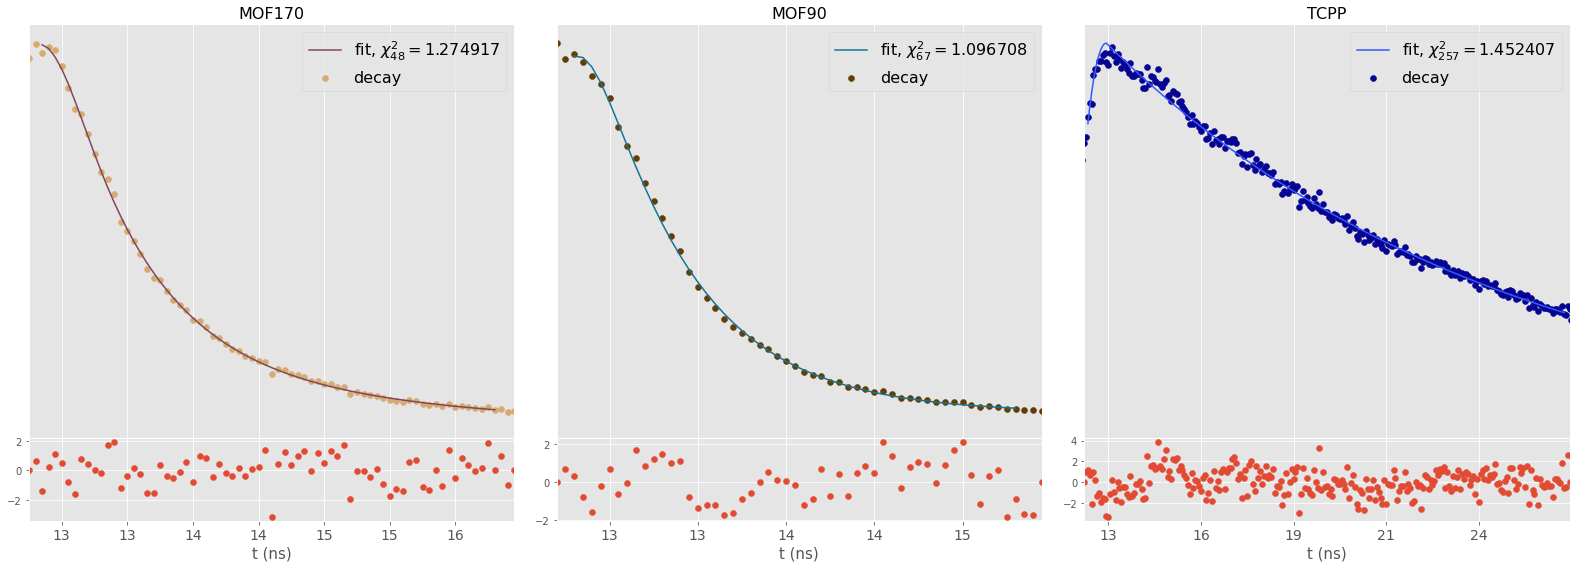

In [ ]:

%cd /content/labo/2021/tau

fd = [(48, 1.274917),(67, 1.096708),(257, 1.452407) ]
fig = plt.figure(figsize= (8,6))
lt = [pd.read_csv(file, sep = '\t') for file in os.listdir() if '.txt' in file and 'meta' not in file]
names = [file[:-4] for file in os.listdir() if '.txt' in file and 'meta' not in file]
fig, ax = plt.subplots(ncols = 3, figsize = (22, 8))
for i, dataframe in enumerate(lt):
  r,g,b = np.random.random(size = 3)
  dataframe.drop(columns = 'Chan', inplace = True)
  index = dataframe.index.to_numpy()
  data = dataframe.to_numpy()
  peak_info = find_peaks(data[:,2], height= 0, width = 0)[1]
  lm, rm = peak_info['left_bases'][0], peak_info['right_bases'][0]
  ax[i].set_title(f'{names[i].upper()}', fontsize = 16)
  ax[i].scatter(index, data[:, 1], label = 'decay' ,color = (r,g,b))
  ax[i].plot(index[lm + 2:rm - 2], data[lm + 2 :rm -2 ,2], label = r'fit, $\chi^2_{%d} = {%f}$'%(fd[i]), color = np.random.random(size = 3))
  print(len(index[lm + 2:rm - 2]))
  # ax[i].semilogy()
  ax[i].set
  ax[i].set_yticks([])
  # plt.ylim(bottom = data[rm,2])
  ax[i].set_xlim((lm, rm))
  ax[i].legend(fontsize = 16)
  # ax[i].set_xticklabels(ax[i].get_xticks() * 0.05486969)
  # ax[i].text(lm + 10, 10,'jumbo', horizontalalignment = 'right')
  divider = make_axes_locatable(ax[i])
  ax2 = divider.append_axes('bottom', size = '20%', pad = 0)
  ax2.scatter(index, data[:,-1])
  ax2.set_xlim(ax[i].get_xlim())
  ax2.set_xticklabels([ int(i) for i in ax[i].get_xticks() * 0.05486969], fontsize = 14)
  ax2.set_xlabel('t (ns)', fontsize = 15)
  plt.savefig('tau.png')
plt.tight_layout()
plt.show()


/content/labo/2021/abs


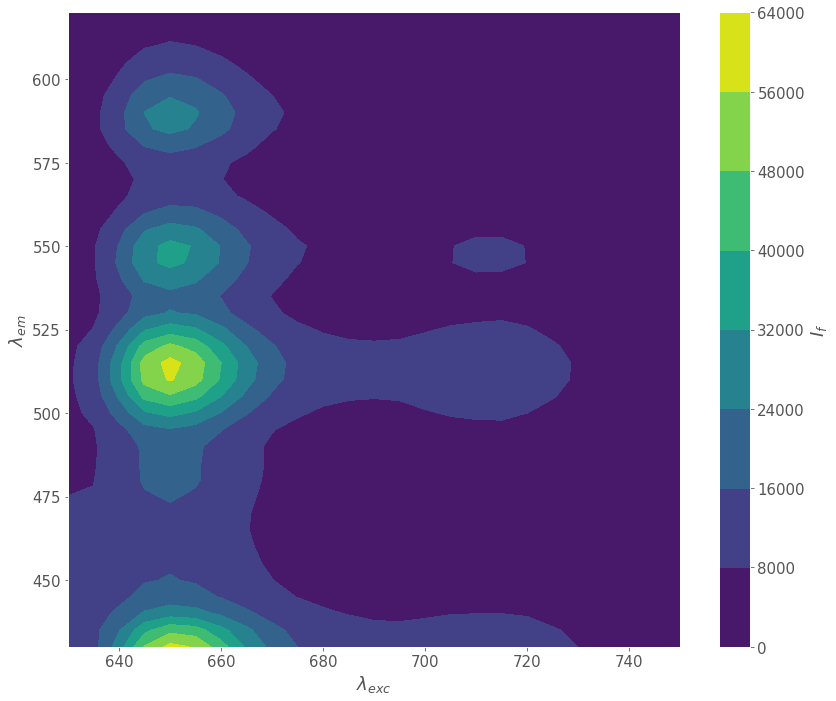

In [ ]:
fig = plt.figure(figsize=(12,10))
%cd /content/labo/2021/abs 
df = pd.read_csv('zrnmof.csv')
df = df.pivot('EM wavelength', 'EX wavelength', 'A1c/R1c')

plot = plt.contourf(df.index, df.columns, df.T.to_numpy(), cmap = 'viridis')
cbr = fig.colorbar(plot)
cbr.set_label('$I_f$')
plt.xlabel('$\lambda_{exc}$')
plt.ylabel('$\lambda_{em}$')
plt.savefig('eem.png')
plt.tight_layout()
plt.show()


# Algoritmos interesantes para regresión y clasificación.


In [ ]:
mpl.rcParams['font.size'] = 15
mpl.rcParams['font.serif'] = 'Helvetica'

## Dataset Boston Housing Prices (Regresión)

In [ ]:
data = load_boston()
d(md(data.DESCR))

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
.. topic:: References

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.


In [ ]:
X,t = data.data[:,:-1], data.data[:,-1:]
X_train, X_test, t_train,t_test = train_test_split(X,t,test_size = .2, random_state = 42)

In [ ]:
X_train.shape

(404, 12)

In [ ]:
modelo = Pipeline([
                   ('scaler', StandardScaler()),
                   ('poly', PolynomialFeatures()),
                   ('ridge', Ridge(fit_intercept= False) )
])
hyperparams= {'ridge__alpha': np.logspace(-3,2,10), 'poly__degree': [i for i in range(1,8)]}
grilla = GridSearchCV(modelo, hyperparams,refit=True)
grilla.fit(X_train, t_train)

In [ ]:
grilla.best_params_

{'poly__degree': 2, 'ridge__alpha': 27.825594022071257}

In [ ]:
z = grilla.cv_results_['mean_test_score'].ravel()
y_g = grilla.cv_results_['param_ridge__alpha'].data.reshape(-1,1).ravel()
x_g = grilla.cv_results_['param_poly__degree'].data.reshape(-1,1).ravel()


In [ ]:
el_mejor = grilla.best_estimator_
yhat_tr = el_mejor.predict(X_train)
yhat_test =  el_mejor.predict(X_test)

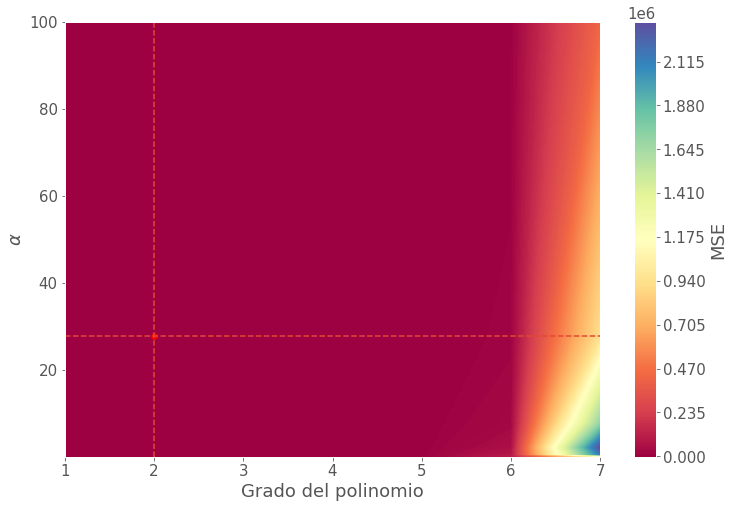

In [ ]:
z = grilla.cv_results_['mean_test_score'].ravel()
y_g = grilla.cv_results_['param_ridge__alpha'].data.reshape(-1,1).ravel()
x_g = grilla.cv_results_['param_poly__degree'].data.reshape(-1,1).ravel()
bestparams = list(grilla.best_params_.values())
df = pd.DataFrame([x_g,y_g,-z]).T
df.columns = ['grado', 'alfa', 'mse']
data = df.pivot('grado', 'alfa', 'mse')
fig1 = plt.figure(figsize = (12,8))
plot = plt.contourf(data.index,data.columns, data.T.to_numpy(), levels = 1000, cmap = 'Spectral')
plt.scatter(*bestparams, c = 'r')
plt.axhline(bestparams[1], ls = '--')
plt.axvline(bestparams[0], ls = '--')
plt.xlabel('Grado del polinomio')
plt.ylabel(r'$\alpha$')
cbar = fig1.colorbar(plot)
cbar.ax.set_ylabel('MSE')
# Add the contour line levels to the colorbar
plt.show()


In [ ]:
d(md(data.to_markdown()))

|   grado |        0.001 |   0.003593813663804626 |   0.01291549665014884 |   0.046415888336127795 |   0.1668100537200059 |   0.5994842503189409 |   2.1544346900318843 |   7.742636826811277 |   27.825594022071257 |         100.0 |
|--------:|-------------:|-----------------------:|----------------------:|-----------------------:|---------------------:|---------------------:|---------------------:|--------------------:|---------------------:|--------------:|
|       1 |    -0.618626 |              -0.618627 |             -0.61863  |              -0.618643 |         -0.618687    |         -0.618832    |         -0.619204    |        -0.618863    |           -0.601926  |     -0.4384   |
|       2 |    -0.306258 |              -0.313996 |             -0.330091 |              -0.361537 |         -0.408706    |         -0.469751    |         -0.547394    |        -0.627749    |           -0.661623  |     -0.611015 |
|       3 |    29.0364   |              23.7664   |             27.4193   |              27.5576   |         26.6374      |         21.3441      |         10.8496      |         2.78308     |           -0.0976869 |     -0.481444 |
|       4 |   251.028    |             170.738    |            115.986    |             103.84     |         58.0981      |         15.7252      |         39.3274      |        84.7219      |           81.7138    |     38.6943   |
|       5 |   215.742    |             272.017    |            540.538    |            1174.5      |       1704.28        |       1632.85        |        954.843       |       292.797       |           42.3985    |    178.725    |
|       6 | 81916.8      |           83692.8      |          88794.9      |           98114.1      |     101719           |      85677.6         |      56457           |     28674.7         |        10085.4       |   2555.25     |
|       7 | 83200.8      |           97684.9      |         159206        |          425752        |          1.19736e+06 |          2.13975e+06 |          2.32713e+06 |         1.70463e+06 |       937471         | 426447        |

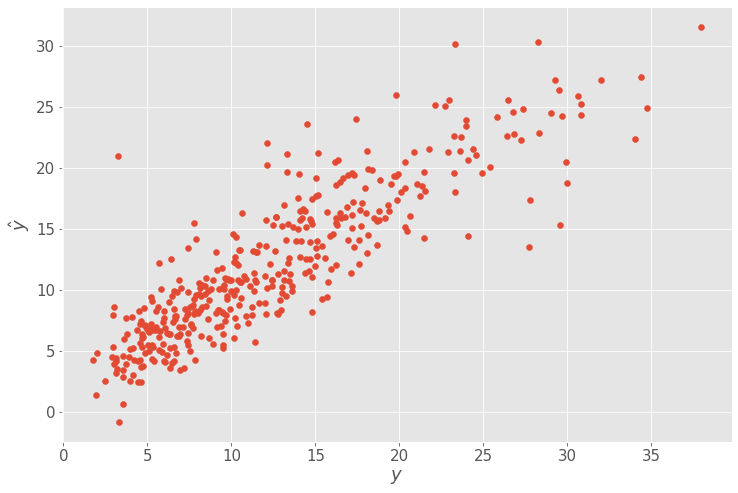

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(t_train, yhat_tr)
plt.xlabel(r'$y$')
plt.ylabel(r'$\hat{y}$')
plt.show()

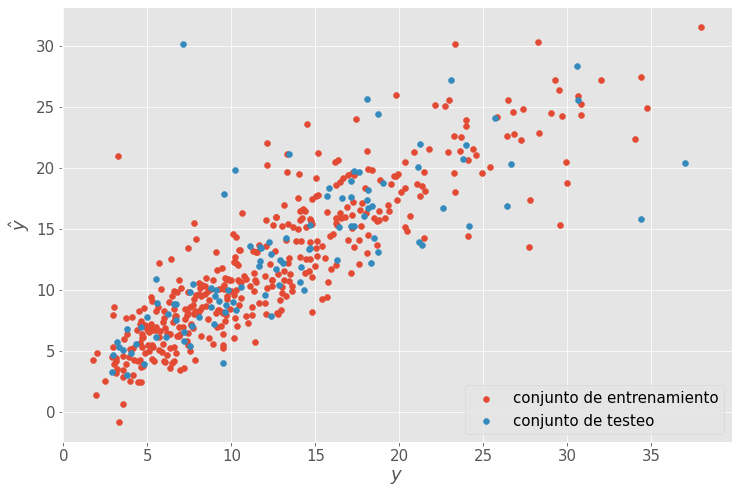

1.7243870887032478

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(t_train, yhat_tr, label = 'conjunto de entrenamiento')
plt.scatter(t_test, yhat_test, label = 'conjunto de testeo')
plt.xlabel(r'$y$')
plt.ylabel(r'$\hat{y}$')
plt.legend()
plt.show()
np.sqrt(mean_absolute_error(t_test, el_mejor.predict((X_test))))


In [ ]:
modelo = Pipeline([
                   ('scaler', StandardScaler()),
                   ('poly', PolynomialFeatures()),
                   ('ridge', Ridge(fit_intercept= False, normalize = True) )
])
random_hyperparams = {'poly__degree': [i for i in range(1,8)], 'ridge__alpha' : loguniform(1e-2,1e3)}
random_grilla = RandomizedSearchCV(modelo, random_hyperparams, refit = True)
random_grilla.fit(X_train, t_train)



RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('poly',
                                              PolynomialFeatures(degree=2,
                                                                 include_bias=True,
                                                                 interaction_only=False,
                                                                 order='C')),
                                             ('ridge',
                                              Ridge(alpha=1.0, copy_X=True,
                                                    fit_intercept=False,
                                     

In [ ]:
z = random_grilla.cv_results_['mean_test_score'].ravel()
y_g = random_grilla.cv_results_['param_ridge__alpha'].data.reshape(-1,1).ravel()
x_g = random_grilla.cv_results_['param_poly__degree'].data.reshape(-1,1).ravel()
bestparams = list(random_grilla.best_params_.values())
df = pd.DataFrame([x_g,y_g,-z]).T
df.columns = ['grado', 'alfa', 'mse']
data = df.pivot('grado', 'alfa', 'mse')

In [ ]:
d(md(data.to_markdown()))

|   grado |   0.011299790622206296 |   0.037239073509958275 |   0.08950661904703396 |   0.2101312570465613 |   0.33665837620906736 |   0.3553989499217948 |   0.8253096051486515 |   0.9353033712014492 |   1.0343179576251713 |   184.89937890283556 |
|--------:|-----------------------:|-----------------------:|----------------------:|---------------------:|----------------------:|---------------------:|---------------------:|---------------------:|---------------------:|---------------------:|
|       1 |               nan      |                 nan    |                   nan |              nan     |              nan      |            -0.618752 |                nan   |               nan    |            -0.618959 |               nan    |
|       3 |                27.1656 |                 nan    |                   nan |              nan     |              nan      |           nan        |                nan   |               nan    |           nan        |               nan    |
|       4 |               nan      |                 nan    |                   nan |               46.949 |               27.6526 |           nan        |                nan   |               nan    |           nan        |               nan    |
|       5 |               nan      |                1051.89 |                   nan |              nan     |              nan      |           nan        |                nan   |              1445.29 |           nan        |               nan    |
|       6 |               nan      |                 nan    |                   nan |              nan     |              nan      |           nan        |              78910.7 |               nan    |           nan        |              1106.57 |
|       7 |               nan      |                 nan    |                751644 |              nan     |              nan      |           nan        |                nan   |               nan    |           nan        |               nan    |

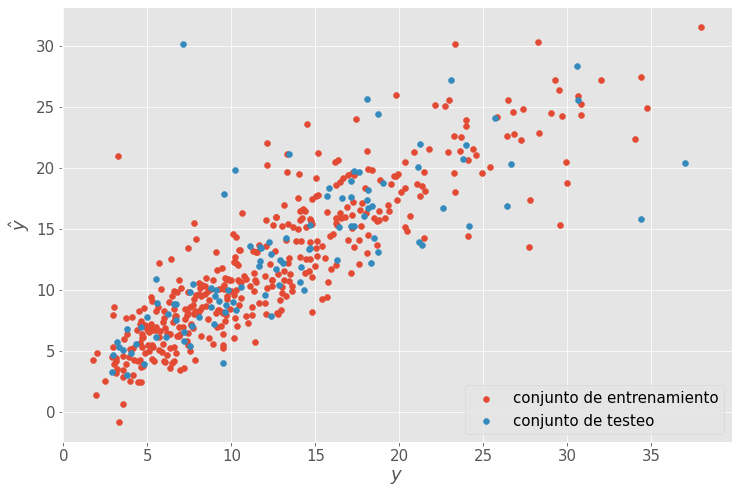

1.6588614101620651

In [ ]:
plt.figure(figsize = (12,8))
el_mejor = random_grilla.best_estimator_
plt.scatter(t_train, yhat_tr, label = 'conjunto de entrenamiento')
plt.scatter(t_test, yhat_test, label = 'conjunto de testeo')
plt.xlabel(r'$y$')
plt.ylabel(r'$\hat{y}$')
plt.legend()
plt.show()
np.sqrt(mean_absolute_error(t_test, el_mejor.predict((X_test))))


In [ ]:
data

alfa,0.011300,0.037239,0.089507,0.210131,0.336658,0.355399,0.825310,0.935303,1.034318,184.899379
grado,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,-0.618752,NaN,NaN,-0.618959,NaN
3.0,27.165602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,46.949016,27.652632,NaN,NaN,NaN,NaN,NaN
5.0,NaN,1051.889441,NaN,NaN,NaN,NaN,NaN,1445.293452,NaN,NaN
6.0,NaN,NaN,NaN,NaN,NaN,NaN,78910.70396,NaN,NaN,1106.573242
7.0,NaN,NaN,751643.970384,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataset Breast Cancer (Clasificación)

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [ ]:
X,t = cancer.data, cancer.target
X_train, X_test, t_train, t_test = train_test_split(X,t, test_size = .2, random_state = 42)

In [ ]:
lr = LogisticRegression(fit_intercept= True, max_iter=100000)
Phi = np.hstack([np.ones(shape = X_train.shape[0]).reshape(-1,1), X_train])
Phi_test = np.hstack([np.ones(shape = X_test.shape[0]).reshape(-1,1), X_test])

lr.fit(Phi, t_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

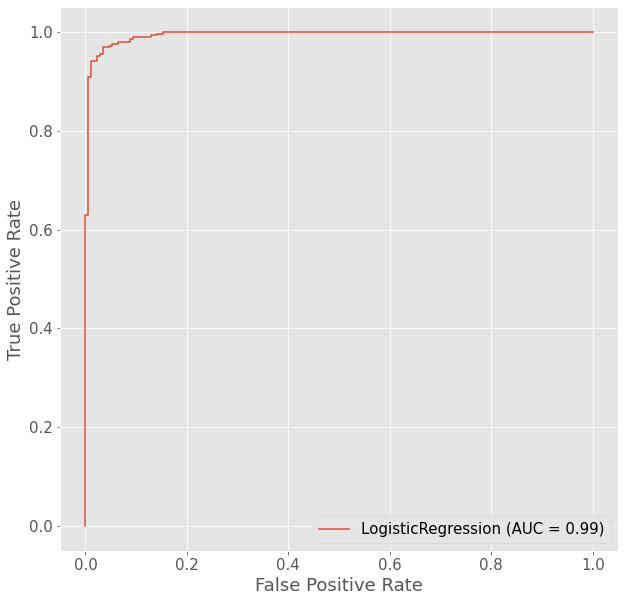

In [ ]:
plt.figure(figsize=(10,10))
plot_roc_curve(lr, Phi, t_train, ax = plt.gca())

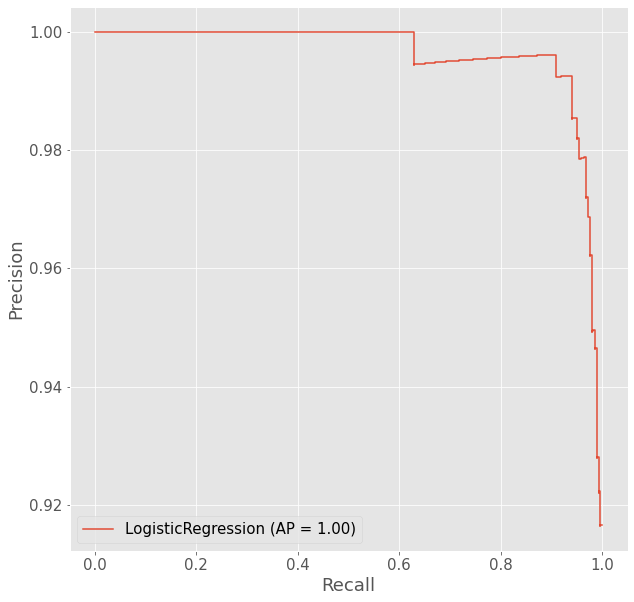

In [ ]:
plt.figure(figsize=(10,10))
plot_precision_recall_curve(lr, Phi, t_train, ax = plt.gca())
plt.show()

In [ ]:
print(f'Precision en conjunto de entrenamiento {cross_val_score(lr, Phi, t_train, scoring = "accuracy").mean():0.3f}' )
print(f'Precision en conjunto de testeo {cross_val_score(lr, X_test, t_test, scoring = "accuracy").mean():0.3f}')

Precision en conjunto de entrenamiento 0.954
Precision en conjunto de testeo 0.956


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
Phi_pca = pca.fit_transform(Phi)
lr_pca = LogisticRegression(fit_intercept=False)
lr_pca.fit(Phi_pca, t_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

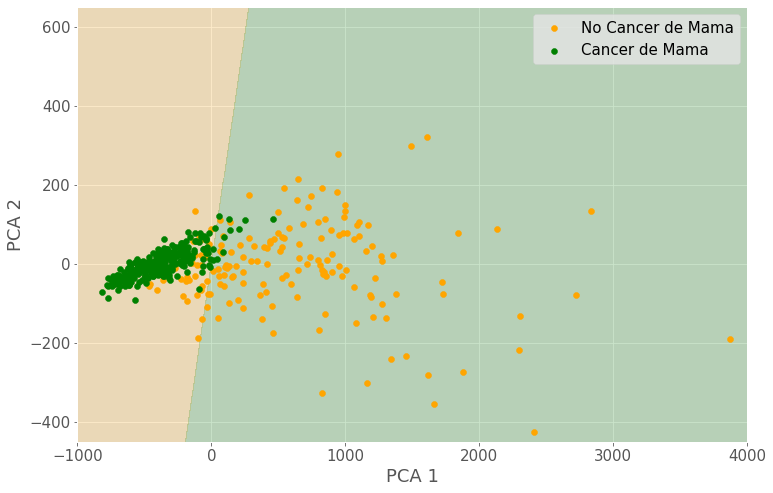

In [ ]:
plt.figure(figsize = (12,8))

pca1 = np.linspace(-500, 650, 2000)
pca2 = np.linspace(-1000, 4000, 2000)
pca1_toplot, pca2_toplot = np.meshgrid(pca1,pca2)
z = lr_pca.predict(np.c_[pca1_toplot.ravel(), pca2_toplot.ravel()]).reshape(pca1_toplot.shape)
plt.contourf(pca2_toplot,pca1_toplot,z, levels=[0.0,0.5,1.0], colors = ['orange', 'green'], alpha = .2)
plt.xlim(-1000, 4000)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.ylim(-450,650)
plt.scatter(Phi_pca[t_train==0,0],Phi_pca[t_train==0,1], c='orange', label="No Cancer de Mama")
plt.scatter(Phi_pca[t_train==1,0],Phi_pca[t_train==1,1], c='green', label="Cancer de Mama")
plt.legend()
plt.show()